## **Getting Started**

In [6]:
#Step 0. Prepare raw input datasets
#0.1 Import required packages
import numpy as np
import pandas as pd

In [7]:
# Turn off the automatic setting that redacts the columns/rows from the dataframe output
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 200)


In [9]:
#0.2 Load & select columns to be used from raw (original) datasets
#0.2.1 Load & select columns from Claims Header dataset

# Load Claims Header dataset
parta_claims_header_raw_df = pd.read_csv("parta_claims_header.csv")
parta_claims_header_raw_df = parta_claims_header_raw_df.sort_values(by=["cur_clm_uniq_id"])


In [10]:
#Data Quality Check #1: If true, the original dataset was unique on claim ID
parta_claims_header_raw_df_count = parta_claims_header_raw_df.shape[0]
parta_claims_header_raw_uniq_clm_id_df = parta_claims_header_raw_df['cur_clm_uniq_id'].drop_duplicates()

parta_claims_header_raw_df_count == parta_claims_header_raw_uniq_clm_id_df.shape[0]

True

In [11]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
parta_claims_header_df = parta_claims_header_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'atndg_prvdr_npi_num', 
    'clm_from_dt', 'prncpl_dgns_cd', 'clm_pmt_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'atndg_prvdr_npi_num': 'npi_id'
    }
)
parta_claims_header_df

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt
510,100190,1228,1.972732e+09,2018-06-10,M1611,127.79
521,100402,1261,1.285688e+09,2017-05-27,K5733,10602.46
525,100464,12978,1.982693e+09,2017-06-26,R079,199.45
536,100698,11789,1.912991e+09,2017-07-28,M545,85.25
540,100750,12138,1.063442e+09,2018-01-13,Z0289,0.00
...,...,...,...,...,...,...
230,1698691,10007,1.679505e+09,2016-12-11,Z01818,43.01
4365,1698722,10985,1.548289e+09,2018-06-16,E782,179.09
4366,1698935,1297,1.922016e+09,2018-04-06,I110,400.81
4367,1699005,12194,1.437130e+09,2016-04-27,I348,265.19


In [12]:
#Data Quality Check #2: If true, the filtered dataset did not have any duplicates

parta_claims_header_df_count = parta_claims_header_df.shape[0]

parta_claims_header_raw_df_count == parta_claims_header_df_count

True

In [13]:
#Data Quality Check #3: If the resulting dataframe is empty, it means all the records have diagnosis code 
parta_claims_header_df.loc[~parta_claims_header_df.prncpl_dgns_cd.notnull()]

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt


In [15]:
#0.2.2 Load & select columns from Claims Revenue Center dataset
# Load Claims Revenue Center dataset
# Note this dataset has more than one record for each claim ID (cur_clm_uniq_id)
# Also note there are two sets of date columns, 
#  one for claim ID (clm_from/thru_dt) and one for claim line (clm_line_from/thru_dt)
parta_claims_revenue_center_detail_raw_df = pd.read_csv(
    "parta_claims_revenue_center_detail.csv"
)
parta_claims_revenue_center_detail_raw_df.sort_values(by=['cur_clm_uniq_id'])

/tmp/ipykernel_10877/1843948042.py:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  parta_claims_revenue_center_detail_raw_df = pd.read_csv(


,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd
318,100073,1,12620,NaN,40,2018-12-02 00:00:00,2018-12-02 00:00:00,403,2018-12-02 00:00:00,77063,NaN,NaN,2018-12-02 00:00:00,2018-12-02 00:00:00,1,24.11,NaN,NaN,NaN,NaN,NaN,00000
383,100184,1,10080,NaN,40,2018-09-06 00:00:00,2018-09-06 00:00:00,1,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,2018-09-06 00:00:00,0,0.00,NaN,NaN,NaN,NaN,NaN,00000
385,100190,2,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,98960,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000
386,100190,3,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,J1100,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,4,0.00,NaN,NaN,NaN,NaN,NaN,00000
390,100190,7,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,1,NaN,NaN,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,0,0.00,NaN,NaN,NaN,NaN,NaN,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29896,1699197,2,1177,NaN,40,2016-05-22 00:00:00,2016-05-22 00:00:00,302,2016-05-22 00:00:00,86592,NaN,NaN,2016-05-22 00:00:00,2016-05-22 00:00:00,1,5.43,NaN,NaN,NaN,NaN,NaN,00000
29898,1699212,1,1262,NaN,60,2018-12-24 00:00:00,2018-12-25 00:00:00,730,NaN,NaN,NaN,NaN,2018-12-24 00:00:00,2018-12-25 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,00000
29900,1699236,2,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,360,2017-09-20 00:00:00,45385,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,1,543.04,NaN,NaN,NaN,NaN,NaN,05312
29899,1699236,1,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,258,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000


In [16]:
#Data Quality Check #4: If the resulting dataframe is empty, it means there is no difference between columns 'clm_line_from_dt' and 'clm_from_dt' for all the rows
parta_claims_revenue_center_detail_raw_df.loc[
    ~(parta_claims_revenue_center_detail_raw_df['clm_line_from_dt'] 
      == parta_claims_revenue_center_detail_raw_df['clm_from_dt'])
]

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd


In [17]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Select 'clm_from_dt' as the column for claim dates since we want uniqueness on claim ID, not claim line
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_from_dt',
    'clm_line_hcpcs_cd', 'clm_line_cvrd_pd_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code'
    }
)
parta_claims_revenue_center_detail_df

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.00
1,1001595,10226,2018-02-28 00:00:00,G0283,9.67
7,1001595,10226,2018-02-28 00:00:00,G8978,0.00
8,1001595,10226,2018-02-28 00:00:00,G8979,0.00
10,1001595,10226,2018-02-28 00:00:00,97110,24.97
...,...,...,...,...,...
59414,999961,12090,2018-03-10 00:00:00,A9516,0.00
59415,999961,12090,2018-03-10 00:00:00,G8996,0.00
59416,999976,10768,2016-01-18 00:00:00,80053,11.37
59417,999976,10768,2016-01-18 00:00:00,80061,12.83


In [18]:
#Data Quality Check #5: If the resulting dataframe is empty, it means all the records have HCPCS code
parta_claims_revenue_center_detail_df.loc[
    ~parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.0
25,1001595,10226,2018-02-28 00:00:00,NaN,0.0
29,1004555,10133,2018-11-02 00:00:00,NaN,0.0
30,1004904,10106,2018-02-26 00:00:00,NaN,0.0
32,100974,10042,2017-02-20 00:00:00,NaN,0.0
...,...,...,...,...,...
59369,999008,12473,2018-08-04 00:00:00,NaN,0.0
59402,999774,10367,2017-11-06 00:00:00,NaN,0.0
59407,999808,10496,2017-07-19 00:00:00,NaN,0.0
59410,999943,11021,2016-11-20 00:00:00,NaN,0.0


In [19]:
# Data Quality Check #5 failed, so remove rows with no HCPCS codes
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_df.loc[
    parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

In [20]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(
    parta_claims_revenue_center_detail_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_claims_revenue_center_detail_df

/tmp/ipykernel_10877/2671745514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(


,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
1,1001595,10226,2018-02-28,G0283,9.67
7,1001595,10226,2018-02-28,G8978,0.00
8,1001595,10226,2018-02-28,G8979,0.00
10,1001595,10226,2018-02-28,97110,24.97
18,1001595,10226,2018-02-28,97140,20.33
...,...,...,...,...,...
59413,999961,12090,2018-03-10,78014,400.05
59414,999961,12090,2018-03-10,A9516,0.00
59415,999961,12090,2018-03-10,G8996,0.00
59416,999976,10768,2016-01-18,80053,11.37


In [21]:
#Mini-Analysis #1: Find whether there are matching claims between Claim Header and Claims Revenue Center datasets

claims_header_unique_claims_df = parta_claims_header_df[[
    'claim_id'
]].drop_duplicates()

claims_header_unique_claims_df['header'] = 1

revenue_center_unique_claims_df = parta_claims_revenue_center_detail_df[[
    'claim_id'
]].drop_duplicates()

revenue_center_unique_claims_df['revenue'] = 1

joined_df1 = pd.merge(
    claims_header_unique_claims_df,
    revenue_center_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df1

,claim_id,header,revenue
0,100073,NaN,1.0
1,100190,1.0,1.0
2,100227,NaN,1.0
3,100402,1.0,NaN
4,100464,1.0,1.0
...,...,...,...
15721,1699137,NaN,1.0
15722,1699155,NaN,1.0
15723,1699195,NaN,1.0
15724,1699197,NaN,1.0


In [22]:
print('# of unique claims in Claims Header dataset: ' 
      + str(claims_header_unique_claims_df.shape[0])
     )
print('# of unique claims in Claims Revenue Center dataset: ' 
      + str(revenue_center_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header dataset: 8626
# of unique claims in Claims Revenue Center dataset: 13406


In [23]:
print('# of unique claims in Claims Header and Claims Revenue Center datasets combined: ' 
      + str(joined_df1.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only Claims Header dataset: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & ~(joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in only Claims Revenue Center dataset: ' 
      + str(joined_df1.loc[~(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in both Claims Header AND Claims Revenue Center datasets: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )

# of unique claims in Claims Header and Claims Revenue Center datasets combined: 15726
From combined list of unique claims - 
# of unique claims in only Claims Header dataset: 2320
# of unique claims in only Claims Revenue Center dataset: 7100
# of unique claims in both Claims Header AND Claims Revenue Center datasets: 6306


In [25]:
#0.2.3 Load & select columns from Diagnosis dataset
# Load the Diagnosis dataset
# Note that 'clm_from_dt' has some records with null values, but we need claim dates for all claims
parta_diagnosis_code_raw_df = pd.read_csv("parta_diagnosis_code.csv")
parta_diagnosis_code_raw_df.sort_values(by=['cur_clm_uniq_id', 'clm_val_sqnc_num'])

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_prod_type_cd,clm_val_sqnc_num,clm_dgns_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_poa_ind,dgns_prcdr_icd_ind
244,100190,1228,NaN,40,NaN,1,M1611,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
243,100190,1228,NaN,40,NaN,2,M25572,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
246,100190,1228,NaN,40,NaN,3,M25551,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
245,100190,1228,NaN,40,NaN,4,M5136,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
366,100402,1261,NaN,60,NaN,11,E119,NaN,100256.0,2017-05-28 00:00:00,2017-06-02 00:00:00,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16232,1699102,11842,NaN,60,NaN,13,Z8673,NaN,330191.0,2017-01-31 00:00:00,2017-02-03 00:00:00,0,0
16236,1699137,10873,NaN,40,NaN,1,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16235,1699137,10873,NaN,40,NaN,2,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16237,1699155,11689,NaN,40,NaN,3,K219,NaN,NaN,NaN,2018-12-06 00:00:00,NaN,0


In [26]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Use 'clm_thru_dt' as claim date columns since 'clm_from_dt' has some nulls
parta_diagnosis_code_df = parta_diagnosis_code_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_thru_dt', 'clm_dgns_cd'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_thru_dt': 'claim_date'
    }
)
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30 00:00:00,K5289
1,1001595,10226,2018-02-28 00:00:00,M25551
2,1001595,10226,2018-02-28 00:00:00,M79604
3,1001865,10133,2018-09-14 00:00:00,G459
4,1004555,10133,2018-11-02 00:00:00,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18 00:00:00,N390
32048,999943,11021,2016-11-20 00:00:00,M545
32049,999961,12090,2018-03-10 00:00:00,C73
32050,999962,11030,2018-07-17 00:00:00,G8194


In [27]:
#Data Quality Check #6: If the resulting dataframe is empty, it means all the records have values for 'clm_thru_dt'
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.claim_date.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


In [28]:
#Data Quality Check #7: If the resulting dataframe is empty, it means all the records have diagnosis code
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.clm_dgns_cd.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


In [29]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_diagnosis_code_df['claim_date'] = pd.to_datetime(
    parta_diagnosis_code_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30,K5289
1,1001595,10226,2018-02-28,M25551
2,1001595,10226,2018-02-28,M79604
3,1001865,10133,2018-09-14,G459
4,1004555,10133,2018-11-02,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18,N390
32048,999943,11021,2016-11-20,M545
32049,999961,12090,2018-03-10,C73
32050,999962,11030,2018-07-17,G8194


In [30]:
#Mini-Analysis #2: Find whether there are matching claims between above two datasets and the Diagnosis dataset
diagnosis_unique_claims_df = parta_diagnosis_code_df[[
    'claim_id'
]].drop_duplicates()

diagnosis_unique_claims_df['diagnosis'] = 1

joined_df2 = pd.merge(
    joined_df1,
    diagnosis_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df2

,claim_id,header,revenue,diagnosis
0,100073,NaN,1.0,NaN
1,100190,1.0,1.0,1.0
2,100227,NaN,1.0,NaN
3,100402,1.0,NaN,1.0
4,100464,1.0,1.0,1.0
...,...,...,...,...
19452,1699137,NaN,1.0,1.0
19453,1699155,NaN,1.0,1.0
19454,1699195,NaN,1.0,NaN
19455,1699197,NaN,1.0,NaN


In [31]:
print('# of unique claims in Claims Header+Claims Revenue Center datasets: ' 
      + str(joined_df1.shape[0])
     )
print('# of unique claims in Diagnosis dataset: ' 
      + str(diagnosis_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center datasets: 15726
# of unique claims in Diagnosis dataset: 13432


In [33]:
print('# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: ' 
      + str(joined_df2.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims only in either Claims Header or Claims Revenue Center datasets: ' 
      + str(joined_df2.loc[
          ((joined_df2.header == 1) | (joined_df2.revenue == 1))
          & ~(joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in only Diagnosis dataset: ' 
      + str(joined_df2.loc[
          (~(joined_df2.header == 1) & ~(joined_df2.revenue == 1))
          & (joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in all three datasets: ' 
      + str(joined_df2.loc[
          (joined_df2.header == 1) & (joined_df2.revenue == 1) & (joined_df2.diagnosis == 1)
      ].shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: 19457
From combined list of unique claims - 
# of unique claims only in either Claims Header or Claims Revenue Center datasets: 6025
# of unique claims in only Diagnosis dataset: 3731
# of unique claims in all three datasets: 5266


In [35]:
#0.2.4 Load & select columns from Procedure dataset
# Load the Procedure dataset
parta_procedure_code_df = pd.read_csv("parta_procedure_code.csv")
parta_procedure_code_df

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_val_sqnc_num,clm_prcdr_cd,clm_prcdr_prfrm_dt,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,dgns_prcdr_icd_ind
0,100402,1261,NaN,60,1,0DJD8ZZ,2017-05-31 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
1,100402,1261,NaN,60,2,0D9670Z,2017-05-29 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
2,100402,1261,NaN,60,3,0DJD8ZZ,2017-06-01 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
3,100402,1261,NaN,60,4,0DB78ZX,2017-05-30 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
4,1008371,1074,NaN,60,1,0T9B7ZZ,2016-12-03 00:00:00,NaN,140007,2016-12-02 00:00:00,2016-12-08 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,357821,10200,NaN,60,2,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
458,357821,10200,NaN,60,1,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
459,412998,10106,NaN,60,1,0SRC0J9,2016-12-09 00:00:00,NaN,250104,2016-12-09 00:00:00,2016-12-10 00:00:00,0
460,460114,10133,NaN,60,1,0QSH04Z,2018-05-17 00:00:00,NaN,150112,2018-05-07 00:00:00,2018-05-23 00:00:00,0


In [36]:
#0.2.5 Load & select columns from DME dataset
# Load the DME dataset
partb_dme_raw_df = pd.read_csv("partb_dme.csv")
partb_dme_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_prmry_pyr_cd,payto_prvdr_npi_num,ordrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_disp_cd
268,100441,2,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,E0607,59.80,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,76.54,1
271,100441,5,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4258,2.27,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,2.84,1
270,100441,4,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4259,4.20,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,4.80,1
267,100441,1,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4256,3.24,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,3.98,1
269,100441,3,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4253,38.57,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,49.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1696080,4,11689,NaN,82,2016-11-18,2016-11-18,P,12,2016-11-18,2016-11-18,A7046,0.00,NaN,1376599084,1.659342e+09,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
129,1696545,1,10046,NaN,82,2017-07-25,2017-07-25,R,12,2017-07-25,2017-07-25,E0570,6.30,NaN,1346347374,1.952397e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,8.12,1
1548,1696792,1,12086,NaN,82,2018-12-23,2018-12-23,P,12,2018-12-23,2018-12-23,A4604,35.58,NaN,1790823722,1.518936e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,48.17,1
1549,1697987,1,11074,NaN,82,2018-04-06,2018-04-06,P,12,2018-04-06,2018-04-06,A4253,27.92,NaN,1902842065,1.750382e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,33.28,1


In [37]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
partb_dme_df = partb_dme_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'ordrg_prvdr_npi_num',
    'clm_from_dt', 'clm_line_hcpcs_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'ordrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code',
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,18.75
...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,4.26


In [38]:
#Data Quality Check #8: If the resulting dataframe is empty, it means all the records have HCPCS code
partb_dme_df.loc[~partb_dme_df.hcpcs_code.notnull()]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost


In [ ]:
#Mini-Analysis #3: Find whether there are matching claims between the first three datasets above and the DME dataset
dme_unique_claims_df = partb_dme_df[[
    'claim_id'
]].drop_duplicates()

dme_unique_claims_df['dme'] = 1

joined_df3 = pd.merge(
    joined_df2,
    dme_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df3

,claim_id,header,revenue,diagnosis,dme
0,100073,NaN,1.0,NaN,NaN
1,100190,1.0,1.0,1.0,NaN
2,100227,NaN,1.0,NaN,NaN
3,100402,1.0,NaN,1.0,NaN
4,100441,NaN,NaN,NaN,1.0
...,...,...,...,...,...
20960,1699137,NaN,1.0,1.0,NaN
20961,1699155,NaN,1.0,1.0,NaN
20962,1699195,NaN,1.0,NaN,NaN
20963,1699197,NaN,1.0,NaN,NaN


In [56]:
dme_unique_claims_df = (
    partb_dme_df[['claim_id']]
    .drop_duplicates()
    .rename(columns={'claim_id': 'claim_id'})
)

print("# of unique claims in first three datasets: ", joined_df2.shape[0])

print("# of unique claims in DME dataset: ", dme_unique_claims_df.shape[0])

# of unique claims in first three datasets:  19457
# of unique claims in DME dataset:  1508


In [58]:
joined_df3 = (
    joined_df2
    .merge(dme_unique_claims_df.assign(dme=1), on='claim_id', how='outer')
    .fillna({'dme': 0})
)

print('# of unique claims in the four datasets combined: ' 
      + str(joined_df3.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & ~(joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in only DME dataset: ' 
      + str(joined_df3.loc[
          ~(joined_df3.header == 1) 
          & ~(joined_df3.revenue == 1)
          & ~(joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in all four datasets: ' 
      + str(joined_df3.loc[
          (joined_df3.header == 1) 
          & (joined_df3.revenue == 1)
          & (joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in DME and any of the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & (joined_df3.dme == 1)
      ].shape[0])
     )

# of unique claims in the four datasets combined: 20965
From combined list of unique claims - 
# of unique claims in only the first three datasets: 19457
# of unique claims in only DME dataset: 1508
# of unique claims in all four datasets: 0
# of unique claims in DME and any of the first three datasets: 0


In [48]:
#0.2.6 Load & select columns from Physicians dataset
# Load the Physicians dataset
partb_physicians_raw_df = pd.read_csv("partb_physicians.csv")
partb_physicians_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,rndrg_prvdr_type_cd,rndrg_prvdr_fips_st_cd,clm_prvdr_spclty_cd,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_line_prmry_pyr_cd,clm_line_dgns_cd,clm_rndrg_prvdr_tax_num,rndrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_line_srvc_unit_qty,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_disp_cd,clm_dgns_1_cd,clm_dgns_2_cd,clm_dgns_3_cd,clm_dgns_4_cd,clm_dgns_5_cd,clm_dgns_6_cd,clm_dgns_7_cd,clm_dgns_8_cd,dgns_prcdr_icd_ind,clm_dgns_9_cd,clm_dgns_10_cd,clm_dgns_11_cd,clm_dgns_12_cd,hcpcs_betos_cd
520,100020,1,1070,NaN,71,2016-10-04,2016-10-04,5,36,69,5,81,2016-10-04,2016-10-04,85610,5.10,NaN,I482,NaN,1.619972e+09,1,A,NaN,NaN,NaN,NaN,NaN,5.49,1.0,NaN,NaN,NaN,NaN,NaN,1,I482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1H
525,100024,1,11654,NaN,71,2016-12-10,2016-12-10,1,39,26,T,11,2016-12-10,2016-12-10,90834,61.17,NaN,F319,NaN,1.811965e+09,1,A,NaN,NaN,NaN,NaN,NaN,79.36,1.0,NaN,NaN,NaN,NaN,NaN,1,F319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M5B
529,100030,1,12052,NaN,71,2017-04-15,2017-04-15,1,5,06,5,21,2017-04-15,2017-04-15,93010,6.92,NaN,R001,NaN,1.336344e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.53,1.0,NaN,NaN,NaN,NaN,NaN,1,R001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T2A
555,100038,1,12345,NaN,71,2018-07-02,2018-07-02,1,34,30,4,19,2018-07-02,2018-07-02,72158,89.30,NaN,M47816,NaN,1.295730e+09,1,A,NaN,NaN,NaN,NaN,NaN,112.57,1.0,26,NaN,NaN,NaN,NaN,1,M47816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I2D
592,100061,1,10252,NaN,71,2016-07-04,2016-07-04,1,33,48,1,11,2016-07-04,2016-07-04,99213,65.83,NaN,L03032,NaN,1.861493e+09,1,A,NaN,NaN,NaN,NaN,NaN,82.36,1.0,NaN,NaN,NaN,NaN,NaN,1,L03032,B351,L853,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,1699176,1,1008,NaN,71,2018-10-18,2018-10-18,1,18,29,1,21,2018-10-18,2018-10-18,99232,56.62,NaN,J9601,NaN,1.730182e+09,1,A,NaN,NaN,NaN,NaN,NaN,73.06,1.0,NaN,NaN,NaN,NaN,NaN,1,J9601,J810,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M2B
66051,1699182,1,13175,NaN,71,2016-11-21,2016-11-21,5,31,69,5,81,2016-11-21,2016-11-21,80053,7.43,NaN,E782,NaN,1.063497e+09,1,A,NaN,NaN,NaN,NaN,NaN,7.87,1.0,NaN,NaN,NaN,NaN,NaN,1,E782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1B
66052,1699186,1,10710,NaN,71,2016-01-18,2016-01-18,1,14,30,4,23,2016-01-18,2016-01-18,73110,7.41,NaN,S52502A,NaN,1.427027e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.97,1.0,26,LT,NaN,NaN,NaN,1,S52502A,S52602A,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I1B
66053,1699204,1,11540,NaN,71,2018-05-08,2018-05-08,1,28,13,1,11,2018-05-08,2018-05-08,99214,80.42,NaN,M5116,NaN,1.275519e+09,1,A,NaN,NaN,NaN,NaN,NaN,101.91,1.0,NaN,NaN,NaN,NaN,NaN,1,M5116,M47816,M48061,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B


In [49]:
#Possible expansio of analysis - keep as side note

partb_physicians_raw_df.groupby('clm_pos_cd').agg(
    uniq_clm_cnt=('cur_clm_uniq_id', 'nunique')
).sort_values(by='uniq_clm_cnt', ascending=False)

,uniq_clm_cnt
clm_pos_cd,
11,34209
81,17512
22,7218
21,6171
23,4505
24,1912
41,1619
19,1435
31,891


In [50]:
# Select only the desired columns and remove duplicates if any
partb_physicians_df = partb_physicians_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'rndrg_prvdr_npi_num', 'clm_from_dt', 
    'clm_line_hcpcs_cd', 'clm_line_dgns_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'rndrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code', 
        'clm_line_dgns_cd': 'diagnosis_code', 
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_physicians_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100117,10046,1.073515e+09,2016-11-19,83861,H04123,0.00
1,1001777,10133,1.053398e+09,2016-12-15,99213,I480,69.50
2,1001907,10113,1.245238e+09,2017-02-09,11721,B351,43.37
3,1002867,10049,1.255316e+09,2017-09-23,88312,D0359,143.39
4,1002871,10026,1.265419e+09,2016-03-11,87086,N390,10.66
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


In [51]:
#Data Quality Check #9: If the resulting dataframe is empty, it means all the records have HCPCS or diagnosis code
partb_physicians_df.loc[
    (~partb_physicians_df.hcpcs_code.notnull()) | (~partb_physicians_df.diagnosis_code.notnull())
]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost


In [59]:
#Mini-Analysis #4: Find whether there are matching claims between above four datasets and the Physicians dataset
physicians_unique_claims_df = partb_physicians_df[[
    'claim_id'
]].drop_duplicates()

physicians_unique_claims_df['physicians'] = 1

joined_df4 = pd.merge(
    joined_df3,
    physicians_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df4

,claim_id,header,revenue,diagnosis,dme,physicians
0,100020,NaN,NaN,NaN,NaN,1.0
1,100024,NaN,NaN,NaN,NaN,1.0
2,100030,NaN,NaN,NaN,NaN,1.0
3,100038,NaN,NaN,NaN,NaN,1.0
4,100061,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
97953,1699195,NaN,1.0,NaN,0.0,NaN
97954,1699197,NaN,1.0,NaN,0.0,NaN
97955,1699204,NaN,NaN,NaN,NaN,1.0
97956,1699222,NaN,NaN,NaN,NaN,1.0


In [60]:
print('# of unique claims in first four datasets: ' 
      + str(joined_df3.shape[0])
     )
print('# of unique claims in Physicians dataset: ' 
      + str(physicians_unique_claims_df.shape[0])
     )

# of unique claims in first four datasets: 20965
# of unique claims in Physicians dataset: 76993


In [61]:
print('# of unique claims in the five datasets combined: ' 
      + str(joined_df4.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & ~(joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in only Physicians dataset: ' 
      + str(joined_df4.loc[
          ~(joined_df4.header == 1) 
          & ~(joined_df4.revenue == 1)
          & ~(joined_df4.diagnosis == 1)
          & ~(joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in all five datasets: ' 
      + str(joined_df4.loc[
          (joined_df4.header == 1) 
          & (joined_df4.revenue == 1)
          & (joined_df4.diagnosis == 1)
          & (joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in Physicians and any of the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & (joined_df4.physicians == 1)
      ].shape[0])
     )

# of unique claims in the five datasets combined: 97958
From combined list of unique claims - 
# of unique claims in only the first four datasets: 20965
# of unique claims in only Physicians dataset: 76993
# of unique claims in all five datasets: 0
# of unique claims in Physicians and any of the first four datasets: 0


In [63]:
#0.2.7 Load & select columns from Patients dataset
# Load the Patients dataset
# For sake of simplicity in concept, beneficiary = patient
beneficiary_demographics_df = pd.read_csv("beneficiary_demographics.csv")
beneficiary_demographics_df

,bene_mbi_id,bene_member_month,bene_hic_num,bene_fips_state_cd,bene_fips_cnty_cd,bene_zip_cd,bene_dob,bene_sex_cd,bene_race_cd,bene_age,bene_mdcr_stus_cd,bene_dual_stus_cd,bene_death_dt,bene_rng_bgn_dt,bene_rng_end_dt,bene_1st_name,bene_midl_name,bene_last_name,bene_orgnl_entlmt_rsn_cd,bene_entlmt_buyin_ind,bene_part_a_enrlmt_bgn_dt,bene_part_b_enrlmt_bgn_dt,bene_line_1_adr,bene_line_2_adr,bene_line_3_adr,bene_line_4_adr,bene_line_5_adr,bene_line_6_adr,geo_zip_plc_name,geo_usps_state_cd,geo_zip5_cd,geo_zip4_cd
0,10,2016-01-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
1,10,2016-02-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
2,10,2016-03-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
3,10,2016-04-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
4,10,2016-05-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31179,13380,2018-02-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31180,13380,2018-03-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31181,13380,2018-04-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31182,13380,2018-05-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN


In [64]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
beneficiary_demographics_df = beneficiary_demographics_df[[
    'bene_mbi_id', 'bene_dob', 'bene_sex_cd'
]].drop_duplicates().rename(
    columns={
        'bene_mbi_id': 'patient_id',
        'bene_dob': 'patient_birth_date'
    }
)
beneficiary_demographics_df

,patient_id,patient_birth_date,bene_sex_cd
0,10,1945-05-16 00:00:00,1
34,10007,1956-01-04 00:00:00,2
63,10010,1932-12-03 00:00:00,2
95,10013,1952-08-23 00:00:00,2
131,10017,1984-11-23 00:00:00,1
...,...,...,...
31037,13374,1948-07-11 00:00:00,2
31072,13376,1952-11-28 00:00:00,2
31103,13377,1956-01-16 00:00:00,1
31122,13379,1926-12-10 00:00:00,2


In [65]:
# Gender code as identified by the CMS CCLF resource (1 = male, 2 = female, 0 = Unknown = N/A)
# Convert gender code into readable acronym and drop original column
beneficiary_demographics_df['patient_gender'] = ''
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 1, 'patient_gender'] = 'M'
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 2, 'patient_gender'] = 'F'
beneficiary_demographics_df = beneficiary_demographics_df.drop('bene_sex_cd', axis=1)
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16 00:00:00,M
34,10007,1956-01-04 00:00:00,F
63,10010,1932-12-03 00:00:00,F
95,10013,1952-08-23 00:00:00,F
131,10017,1984-11-23 00:00:00,M
...,...,...,...
31037,13374,1948-07-11 00:00:00,F
31072,13376,1952-11-28 00:00:00,F
31103,13377,1956-01-16 00:00:00,M
31122,13379,1926-12-10 00:00:00,F


In [66]:
# Update date format for patient birth dates to match that of other date columns
beneficiary_demographics_df['patient_birth_date'] = pd.to_datetime(
    beneficiary_demographics_df['patient_birth_date']
).dt.strftime('%Y-%m-%d')
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16,M
34,10007,1956-01-04,F
63,10010,1932-12-03,F
95,10013,1952-08-23,F
131,10017,1984-11-23,M
...,...,...,...
31037,13374,1948-07-11,F
31072,13376,1952-11-28,F
31103,13377,1956-01-16,M
31122,13379,1926-12-10,F


In [67]:
#Mini-Analysis #5: Find whether there are matching patients between the claims datasets and the Patients dataset
claims_header_unique_patients_df = parta_claims_header_df[[
    'patient_id'
]].drop_duplicates()

claims_header_unique_patients_df['header'] = 1

revenue_center_unique_patients_df = parta_claims_revenue_center_detail_df[[
    'patient_id'
]].drop_duplicates()

revenue_center_unique_patients_df['revenue'] = 1

diagnosis_unique_patients_df = parta_diagnosis_code_df[[
    'patient_id'
]].drop_duplicates()

diagnosis_unique_patients_df['diagnosis'] = 1

dme_unique_patients_df = partb_dme_df[[
    'patient_id'
]].drop_duplicates()

dme_unique_patients_df['dme'] = 1

physicians_unique_patients_df = partb_physicians_df[[
    'patient_id'
]].drop_duplicates()

physicians_unique_patients_df['physicians'] = 1

beneficiary_unique_patients_df = beneficiary_demographics_df[[
    'patient_id'
]].drop_duplicates()

beneficiary_unique_patients_df['beneficiary'] = 1

joined_patients_df = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    claims_header_unique_patients_df,
                    revenue_center_unique_patients_df,
                    on='patient_id', how = 'outer'
                ),
                diagnosis_unique_patients_df,
                on='patient_id', how = 'outer'
            ),
            dme_unique_patients_df,
            on='patient_id', how = 'outer'
        ),
        physicians_unique_patients_df,
        on='patient_id', how = 'outer'
    ),
    beneficiary_unique_patients_df,
    on='patient_id', how = 'outer'
)

joined_patients_df

,patient_id,header,revenue,diagnosis,dme,physicians,beneficiary
0,10,1.0,1.0,1.0,NaN,1.0,1
1,12,NaN,NaN,NaN,NaN,NaN,1
2,13,1.0,1.0,1.0,1.0,1.0,1
3,102,1.0,1.0,1.0,NaN,1.0,1
4,109,1.0,1.0,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...
995,13374,1.0,1.0,1.0,NaN,1.0,1
996,13376,1.0,1.0,1.0,NaN,1.0,1
997,13377,1.0,1.0,1.0,1.0,1.0,1
998,13379,NaN,NaN,NaN,NaN,1.0,1


In [68]:
print('# of unique patients in the five datasets combined: ' 
      + str(joined_patients_df.shape[0])
     )
print('From combined list of unique patients - ')
print('# of unique patients in only the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & ~(joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in only Beneficiary dataset: ' 
      + str(joined_patients_df.loc[
          ~(joined_patients_df.header == 1) 
          & ~(joined_patients_df.revenue == 1)
          & ~(joined_patients_df.diagnosis == 1)
          & ~(joined_patients_df.dme == 1)
          & ~(joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in all five datasets: ' 
      + str(joined_patients_df.loc[
          (joined_patients_df.header == 1) 
          & (joined_patients_df.revenue == 1)
          & (joined_patients_df.diagnosis == 1)
          & (joined_patients_df.dme == 1)
          & (joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in Beneficiary and any of the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )


# of unique patients in the five datasets combined: 1000
From combined list of unique patients - 
# of unique patients in only the claims datasets: 0
# of unique patients in only Beneficiary dataset: 38
# of unique patients in all five datasets: 276
# of unique patients in Beneficiary and any of the claims datasets: 962


In [69]:
#0.3 Combine all datasets
#0.3.1. Join datasets with common records
# Join Claims Header and Claims Revenue Center datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    parta_claims_header_df,
    parta_claims_revenue_center_detail_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt
0,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11
1,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,G0467,133.74
2,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,98960,0.00
3,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1100,0.00
4,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1885,0.00
...,...,...,...,...,...,...,...,...
38389,1699195,10958,NaN,2017-04-19,NaN,NaN,00810,0.00
38390,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00
38391,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00
38392,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43


In [70]:
# Join Medicare and Diagnosis datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    medicare_df,
    parta_diagnosis_code_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,clm_dgns_cd
0,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11,NaN
1,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,G0467,133.74,M25572
2,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,G0467,133.74,M1611
3,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,G0467,133.74,M5136
4,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,G0467,133.74,M25551
...,...,...,...,...,...,...,...,...,...
106780,1699195,10958,NaN,2017-04-19,NaN,NaN,00810,0.00,NaN
106781,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00,NaN
106782,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00,NaN
106783,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43,NaN


In [71]:
# Since Claims Header dataset has some principal diagnosis codes and the Diagnosis dataset 
#  supplements them with additional codes wherever possible, 
#  coalesce them with preference to the principal code from Claim Header dataset
# Once the diagnosis codes are combined into one column, remove the older columns and any duplicates
medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]
medicare_df = medicare_df.drop(['prncpl_dgns_cd', 'clm_dgns_cd'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

/tmp/ipykernel_10877/4291206876.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]


,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code
0,100073,12620,NaN,2018-12-02,NaN,77063,24.11,NaN
1,100190,1228,1.972732e+09,2018-06-10,127.79,G0467,133.74,M1611
5,100190,1228,1.972732e+09,2018-06-10,127.79,98960,0.00,M1611
9,100190,1228,1.972732e+09,2018-06-10,127.79,J1100,0.00,M1611
13,100190,1228,1.972732e+09,2018-06-10,127.79,J1885,0.00,M1611
17,100190,1228,1.972732e+09,2018-06-10,127.79,J2270,0.00,M1611
21,100190,1228,1.972732e+09,2018-06-10,127.79,99213,0.00,M1611
25,100227,12140,NaN,2018-10-24,NaN,J2785,0.00,NaN
26,100402,1261,1.285688e+09,2017-05-27,10602.46,NaN,NaN,K5733
27,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,R197


In [72]:
# Since Claims Header dataset records the amount Medicare paid for the claims 
#  and Claims Revenue Center dataset records the amount Medicare reimbursed the provider,
#  assume they were separate charges and add them to get the total cost for claim (for particular code)
# Once the costs are combined into one column, remove the older columns and any duplicates
medicare_df['claim_cost'] = medicare_df['clm_pmt_amt']+medicare_df['clm_line_cvrd_pd_amt']
medicare_df = medicare_df.drop(['clm_pmt_amt', 'clm_line_cvrd_pd_amt'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
17,100190,1228,1.972732e+09,2018-06-10,J2270,M1611,127.79
21,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79
25,100227,12140,NaN,2018-10-24,J2785,NaN,NaN
26,100402,1261,1.285688e+09,2017-05-27,NaN,K5733,NaN
27,100402,1261,NaN,2017-06-02,NaN,R197,NaN


In [73]:
claims_header_revenue_diagnosis_df_count = medicare_df.shape[0]

In [74]:
#0.3.2 Append datasets with no common records
# Create a dummy column for diagnosis code in DME dataset before appending so the list of columns match
partb_dme_df['diagnosis_code'] = np.nan
partb_dme_df = partb_dme_df[[
    'claim_id', 'patient_id', 'npi_id', 'claim_date', 'hcpcs_code', 'diagnosis_code', 'claim_cost'
]]
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,NaN,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,NaN,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,NaN,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,NaN,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,NaN,18.75
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [75]:
# Append DME dataset to the first three claims datasets
medicare_df = pd.concat([medicare_df, partb_dme_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [ ]:
claims_header_revenue_diagnosis_dme_df_count = medicare_df.shape[0]

In [76]:
#Data Quality Check #10: If True, we appended DME dataset to the first three claims datasets without any unexpected rows accruing
partb_dme_df_count = partb_dme_df.shape[0]
claims_w_dme_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis: ' 
      + str(claims_header_revenue_diagnosis_df_count))
print('Claim count for DME: ' + str(partb_dme_df_count))
print('Expected claim count after appending DME dataset: ' 
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count))
print('Actual claim count after appending DME dataset: '
     + str(claims_w_dme_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count == claims_w_dme_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis: 66917
Claim count for DME: 2731
Expected claim count after appending DME dataset: 69648
Actual claim count after appending DME dataset: 69648
Expected and actual claim count matches: True


In [77]:
# Append Physicians dataset to the first four claims datasets
medicare_df = pd.concat([medicare_df, partb_physicians_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


In [80]:
partb_physicians_df_count = partb_physicians_df.shape[0]
claims_w_physicians_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis + DME: ' 
      + str(claims_header_revenue_diagnosis_dme_df_count))
print('Claim count for Physicians: ' + str(partb_physicians_df_count))
print('Expected claim count after appending Physicians dataset: ' 
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count))
print('Actual claim count after appending Physicians dataset: '
     + str(claims_w_physicians_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count 
           == claims_w_physicians_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis + DME: 20965
Claim count for Physicians: 128904
Expected claim count after appending Physicians dataset: 149869
Actual claim count after appending Physicians dataset: 198552
Expected and actual claim count matches: False


In [81]:
# Capture # records now to compare after joining patient details
medicare_claims_df_count = medicare_df.shape[0]

In [82]:
#0.3.3 Join patient information
# Join claims data with patient details on patient ID
# Perform left join to only provide patient details for existing claims
medicare_df = pd.merge(
    medicare_df,
    beneficiary_demographics_df,
    on=['patient_id'], how='left'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender
70160,100020,1070,1.619972e+09,2016-10-04,85610,I482,5.49,1947-06-06,M
70165,100024,11654,1.811965e+09,2016-12-10,90834,F319,79.36,1977-11-08,M
70169,100030,12052,1.336344e+09,2017-04-15,93010,R001,8.53,1949-06-25,F
70195,100038,12345,1.295730e+09,2018-07-02,72158,M47816,112.57,1947-01-28,F
70230,100061,10252,1.861493e+09,2016-07-04,99213,L03032,82.36,1933-02-09,F
...,...,...,...,...,...,...,...,...,...
66915,1699197,1177,NaN,2016-05-22,86592,NaN,NaN,1948-09-07,M
66914,1699197,1177,NaN,2016-05-22,36415,NaN,NaN,1948-09-07,M
134759,1699204,11540,1.275519e+09,2018-05-08,99214,M5116,101.91,1952-03-08,F
134760,1699222,11556,1.932188e+09,2016-03-16,J7060,I872,10.66,1955-02-04,F


In [83]:
#Data Quality Check #12: If True, we joined Patient dataset to the claims datasets without any unexpected rows accruing
# Check # records to ensure no extra records happened accidentally
medicare_claims_n_patient_info_df_count = medicare_df.shape[0]

print('Claims count before adding patient details: ' + str(medicare_claims_df_count))
print('Claims count after adding patient details: ' + str(medicare_claims_n_patient_info_df_count))
print('If True, no extra records were added accidentally from joining patient details into the claims: '
      + str(medicare_claims_df_count == medicare_claims_n_patient_info_df_count))

Claims count before adding patient details: 198552
Claims count after adding patient details: 198552
If True, no extra records were added accidentally from joining patient details into the claims: True


In [84]:
# Get claim year
medicare_df['claim_year'] = pd.to_datetime(
    medicare_df['claim_date']
).dt.strftime('%Y')
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,2018
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53,1954-10-09,F,2018
2,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79,1954-10-09,F,2018
3,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79,1954-10-09,F,2018
4,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79,1954-10-09,F,2018
...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,1947-01-28,F,2018
198548,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14,1947-01-28,F,2018
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018
198550,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,1945-04-03,F,2016


In [85]:
# Get patient age - subtract birthdate from claim date year to get the patient age at the time of claims
medicare_df['patient_birth_year'] = pd.to_datetime(
    medicare_df['patient_birth_date']
).dt.strftime('%Y')

medicare_df['patient_age'] = (
    medicare_df['claim_year'].astype('int') - medicare_df['patient_birth_year'].astype('int')
)

medicare_df = medicare_df.drop('patient_birth_year', axis=1)

medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,2018,82
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53,1954-10-09,F,2018,64
2,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79,1954-10-09,F,2018,64
3,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79,1954-10-09,F,2018,64
4,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79,1954-10-09,F,2018,64
...,...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,1947-01-28,F,2018,71
198548,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14,1947-01-28,F,2018,71
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018,71
198550,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,1945-04-03,F,2016,71


In [86]:
#0.4 Analyze the top 100 HCPCS/CPT codes
#0.4.1 Group by HCPCS/CPT codes and count the number of unique claims IDs in descending order, and take first 100 codes with the most number of claims
claim_count_per_hcpcs_df = medicare_df.groupby('hcpcs_code').agg(
    uniq_clm_cnt=('claim_id', 'nunique')
).sort_values('uniq_clm_cnt', ascending=False)

claim_count_per_hcpcs_top100_df = claim_count_per_hcpcs_df.head(100)
claim_count_per_hcpcs_top100_df

,uniq_clm_cnt
hcpcs_code,
36415,8188
99214,7796
99213,6600
80053,5087
85025,4911
...,...
74176,336
99222,332
G0283,324


In [87]:
#0.4.2 Look up descriptions of the codes online and categorize them into broader medical fields/activities
hcpcs_code_100_df = pd.DataFrame({
    'hcpcs_code': [
        '36415', '99214', '99213', '80053', '85025', 
        '80061', '84443', '83036', '80048', '93010', 
        '81001', 'G8427', '93000', '88305', '82306', 
        'G0463', '87086', '99232', 'G0008', '85610', 
        '93306', '1036F', '84439', 'A0425', '99285', 
        '81003', '92014', '93005', '71020', '85027', 
        '70450', '82607', '71045', '99204', '97110', 
        '99212', 'G0202', '77063', '83735', 'G9637', 
        '99203', '71010', '90662', '99284', '71046', 
        'G0439', '82570', '84484', '84153', '17000', 
        '97140', '78452', '99215', '87186', '82043', 
        '77067', '87088', '99233', '4040F', '96372', 
        '82550', '83540', 'G8907', 'A0427', '99223', 
        'Q9967', '92012', '84550', '81002', 'G8918', 
        '92134', '82565', '82728', '17003', '83550', 
        '77080', '87077', 'A9270', '7025F', 'G0471', 
        '74177', '92015', '85652', '98941', '80076', 
        'G8420', '82746', '93880', '77052', '11100', 
        'G9551', '86140', 'G0009', '83880', '66984', 
        '74176', '99222', 'G0283', '11721', '84481'
    ],
    'description': [
        'Venous Procedures','Established Patient Office or Other Outpatient Services','Established Patient Office or Other Outpatient Services','Organ or Disease Oriented Panels','Blood count', 
        'Organ or Disease Oriented Panels','Chemistry Procedures','Hemoglobin','Organ or Disease Oriented Panels','Electrocardiogram, routine ECG with at least 12 leads', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Eligible clinician attests to documenting in the medical record they obtained, updated, or reviewed the patient\'s current medications','Electrocardiogram, routine ECG with at least 12 leads','Surgical pathology, gross and microscopic examination','Vitamin D', 
        'Hospital outpatient clinic visit for assessment and management of a patient','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Administration of influenza virus vaccine','Prothrombin time', 
        'Echocardiography, transthoracic, real-time with image documentation (2D), includes M-mode recording, when performed','Patient History','Thyroxine','Ground mileage, per statute mile','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Electrocardiogram, routine ECG with at least 12 leads','DELETED','Blood count',
        'Computed tomography, head or brain','Cyanocobalamin (Vitamin B-12)','Radiologic examination, chest','New Patient Office or Other Outpatient Services','Therapeutic procedure, 1 or more areas, each 15 minutes',
        'Established Patient Office or Other Outpatient Services','Screening mammography, bilateral (2-view study of each breast), including computer-aided detection (cad) when performed','Breast, Mammography','Chemistry Procedures','Final reports with documentation of one or more dose reduction techniques (e.g., automated exposure control, adjustment of the ma and/or kv according to patient size, use of iterative reconstruction technique)', 
        'New Patient Office or Other Outpatient Services','DELETED','Influenza virus vaccine','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history','Radiologic examination, chest',
        'Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit','Creatinine','Chemistry Procedures','Prostate specific antigen (PSA)','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)',
        'Therapeutic Procedures','Myocardial perfusion imaging, tomographic (SPECT) (including attenuation correction, qualitative or quantitative wall motion, ejection fraction by first pass or gated technique, additional quantification, when performed)','Established Patient Office or Other Outpatient Services','Susceptibility studies, antimicrobial agent','Albumin',
        'Breast, Mammography','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Therapeutic, Preventive or Other Interventions','Therapeutic, prophylactic, or diagnostic injection (specify substance or drug)',
        'Creatine kinase (CK), (CPK)','Chemistry Procedures','Patient documented not to have experienced any of the following events: a burn prior to discharge; a fall within the facility; wrong site/side/patient/procedure/implant event; or a hospital transfer or hospital admission upon discharge from the facility','Ambulance service, advanced life support, emergency transport, level 1 (als 1 - emergency)','New or Established Patient',
        'Low osmolar contrast material, 300-399 mg/ml iodine concentration, per ml','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Uric acid','Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Patient without preoperative order for iv antibiotic surgical site infection (ssi) prophylaxis',
        'Scanning computerized ophthalmic diagnostic imaging, anterior segment, with interpretation and report','Creatinine','Chemistry Procedures','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)','Chemistry Procedures',
        'Dual-energy X-ray absorptiometry (DXA), bone density study, 1 or more sites','Culture, bacterial','Non-covered item or service','Structural Measures','Collection of venous blood by venipuncture or urine sample by catheterization from an individual in a skilled nursing facility (snf) or by a laboratory on behalf of a home health agency (hha)',
        'Computed tomography, abdomen and pelvis','Special Ophthalmological Services and Procedures','Sedimentation rate, erythrocyte','Chiropractic manipulative treatment (CMT)','Organ or Disease Oriented Panels',
        'Bmi is documented within normal parameters and no follow-up plan is required','Folic acid','Duplex scan of extracranial arteries','DELETED','Biopsy of skin, subcutaneous tissue and/or mucous membrane (including simple closure), unless otherwise listed',
        'Final reports for imaging studies without an incidentally found lesion noted','C-reactive protein','Administration of pneumococcal vaccine','Chemistry Procedures','Intraocular Lens Procedures',
        'Computed tomography, abdomen and pelvis','New or Established Patient','Electrical stimulation (unattended), to one or more areas for indication(s) other than wound care, as part of a therapy plan of care','Debridement of nail(s) by any method(s)','Triiodothyronine T3'
    ],
    'category': [
        'Cardiac','Administrative','Administrative','Panels','Blood test',
        'Panels','Chemistry','Blood test','Panels','Cardiac',
        'Urinalysis','Administrative','Cardiac','Pathology','Blood test',
        'Administrative','Pathology','Administrative','Vaccine','Liver',
        'Cardiac','Administrative','Blood test','Others','Administrative',
        'Urinalysis','Ophthalmology','Cardiac','Others','Blood test',
        'Tomography','Blood test','Radiology','Administrative','Therapy',
        'Administrative','Mammography','Mammography','Chemistry','Administrative',
        'Administrative','Others','Vaccine','Administrative','Radiology',
        'Administrative','Blood test','Chemistry','Blood test','Destructive surgical procedures',
        'Therapy','Cardiac','Administrative','Pathology','Blood test',
        'Mammography','Pathology','Administrative','Therapy','Therapy',
        'Blood test','Chemistry','Administrative','Administrative','Administrative',
        'Radiology','Ophthalmology','Urinalysis','Urinalysis','Administrative',
        'Ophthalmology','Blood test','Chemistry','Destructive surgical procedures','Chemistry',
        'Radiology','Pathology','Others','Administrative','Pathology',
        'Tomography','Ophthalmology','Blood test','Chiropractic','Panels',
        'Administrative','Blood test','Radiology','Others','Pathology',
        'Administrative','Blood test','Vaccine','Chemistry','Ophthalmology',
        'Tomography','Administrative','Therapy','Destructive surgical procedures','Blood test'
    ]
})
hcpcs_code_100_df.head(100)

,hcpcs_code,description,category
0,36415,Venous Procedures,Cardiac
1,99214,Established Patient Office or Other Outpatient...,Administrative
2,99213,Established Patient Office or Other Outpatient...,Administrative
3,80053,Organ or Disease Oriented Panels,Panels
4,85025,Blood count,Blood test
...,...,...,...
95,74176,"Computed tomography, abdomen and pelvis",Tomography
96,99222,New or Established Patient,Administrative
97,G0283,"Electrical stimulation (unattended), to one or...",Therapy
98,11721,Debridement of nail(s) by any method(s),Destructive surgical procedures


---

### **Q1. Based on the trends for the share of CVM claims as a percentage of total claims over the years 2016 through 2018, what are some business insights you can gather? What are some additional analyses you could do based on these trends?**

**Hints**
1. Calculate the share of CVM claims from years 2016–2018 using top 100 HCPCS/CPT codes  
2. Reference the Medicare Analysis discussed during class (Top Procedure + Analysis #1)  
3. CVM includes HCPCS/CPT codes related to Cardiac field/procedures  
4. Think about business insights in terms of key decisions that sales and marketing leadership needs to make, e.g.:
   - Sales force size
   - Sales force tactics (messaging sent out to HCPs)
   - Patient experience programs

**Expected Technical Output** 
1. A 100% stacked bar graph
2. Each bar represents a year
3. Each bar consists of percentage of CVM and non-CVM claims

**Answer**
>What are some business insights you can gather?

Between 2016 and 2018, the share of cardiovascular-related claims increased steadily from **15.6% to 16.6%**, indicating an upward trend in cardiovascular procedure utilization. This trend underscores a **growing cardiovascular disease burden**, driven largely by aging patient populations. Also, the age-segmented analysis shows a notable spike once patients enter their 60s, with the highest concentrations seen in individuals aged **70–79**.


This insight highlights an opportunity for commercial expansion, particularly in heart-health therapeutics, diagnostics, and preventive solutions. Sales and marketing strategies can focus on **early education and outreach** to both physicians and younger populations, encouraging preventive screening and cardiovascular risk management. Tailored messaging around early intervention and lifestyle modification may help delay progression and improve outcomes, while also expanding market potential.

>What are some additional analyses you could do based on these trends?

To build on these findings, further segmentation such as **age-based analysis** can help refine commercial and medical strategies. Given the sharp increase in CVM procedures among patients aged 60+, an additional recommended analysis is early-risk population profiling, comparing CVM incidence in patients in their 50s versus those in their 60s to identify opportunities for earlier prevention, education, and engagement. **Geographic segmentation** would also be valuable. For example, comparing CVM claim rates across urban and rural areas or across regions to assess whether lifestyle patterns, socioeconomic conditions, or differences in healthcare access correlate with cardiovascular disease burden. These insights could support localized outreach, resource allocation, and public-health education campaigns that ensure targeted prevention and commercial efforts in higher-risk communities.

A further recommended analysis would involve examining **socioeconomic status and access to cardiovascular care**. Since cardiovascular risk increases with age and many patients enter retirement during this period, it would be useful to compare claim patterns across income tiers, insurance types, and retirement-benefit levels. This analysis could evaluate whether patients with higher retirement income or supplemental insurance receive earlier intervention, higher utilization of advanced cardiac procedures, and better continuity of care compared with lower-income groups. 








In [88]:
# Filter top 100 code dataframe to CVM/Cardiac only
cvm_codes = hcpcs_code_100_df.loc[
    hcpcs_code_100_df['category'] == 'Cardiac', 'hcpcs_code'
].unique()

# Flag CVM claims
medicare_df['is_CVM'] = medicare_df['hcpcs_code'].isin(cvm_codes)

In [89]:
# Calculation of CVM share (keeping only 2016–2018)
claims_by_year = medicare_df.groupby('claim_year').agg(
    total_claims=('claim_id', 'nunique'),
    cvm_claims=('is_CVM', lambda x: x.sum())
).reset_index()

# Keep only 2016, 2017, 2018
claims_by_year = claims_by_year[claims_by_year['claim_year'].isin(['2016','2017','2018'])]

# Calculate CVM share as percentage
claims_by_year['cvm_share%'] = (claims_by_year['cvm_claims'] / claims_by_year['total_claims']) * 100

claims_by_year

,claim_year,total_claims,cvm_claims,cvm_share%
2,2016,28652,4475,15.618456
3,2017,32021,5211,16.273695
4,2018,37292,6182,16.577282


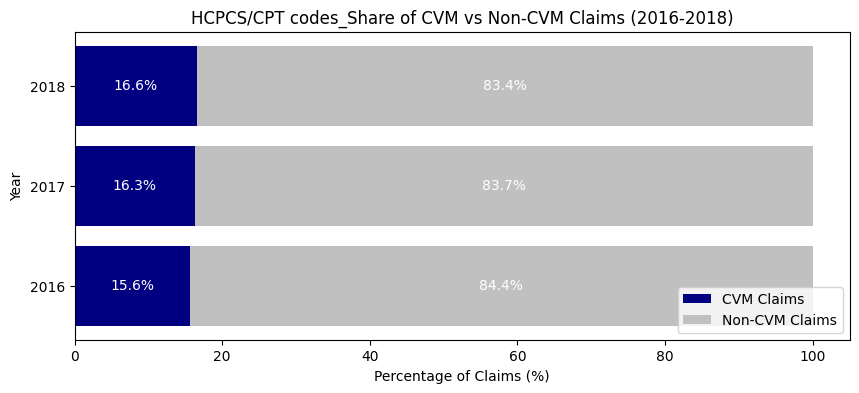

In [90]:
import matplotlib.pyplot as plt

# Prepare data
years = claims_by_year['claim_year']
cvm_pct = claims_by_year['cvm_share%']
non_cvm_pct = 100 - claims_by_year['cvm_share%']

plt.figure(figsize=(10,4))

# Horizontal stacked bars
plt.barh(years, cvm_pct, color="#000080", label="CVM Claims")
plt.barh(years, non_cvm_pct, left=cvm_pct, color="#c0c0c0", label="Non-CVM Claims")

# Labels & title
plt.xlabel("Percentage of Claims (%)")
plt.ylabel("Year")
plt.title("HCPCS/CPT codes_Share of CVM vs Non-CVM Claims (2016-2018)")
plt.legend(loc="lower right")

# Percentage label on bars
for i, (cvm, non) in enumerate(zip(cvm_pct, non_cvm_pct)):
    plt.text(cvm/2, years.iloc[i], f"{cvm:.1f}%", ha="center", va="center", color="white", fontsize=10)
    plt.text(cvm + non/2, years.iloc[i], f"{non:.1f}%", ha="center", va="center", color="white", fontsize=10)

plt.show()


In [91]:
# Age segmentation for CVM %
cvm_df = medicare_df[medicare_df['is_CVM'] == 1]

bins = [0, 50, 60, 70, 80, 120]
labels = ['<50', '50-59', '60-69', '70-79', '80+']
cvm_df['age_group'] = pd.cut(cvm_df['patient_age'], bins=bins, labels=labels)

# Calculate % distribution
cvm_age_dist = cvm_df['age_group'].value_counts(normalize=True) * 100
cvm_age_dist = cvm_age_dist.reindex(labels)

# Convert to DataFrame with clear column name
cvm_age_dist = cvm_age_dist.to_frame(name='CVM% by age')

# Add title row
print("=== Cardiovascular Claims Share by Age Group (2016–2018) ===\n")
print(cvm_age_dist)

=== Cardiovascular Claims Share by Age Group (2016–2018) ===

           CVM% by age
age_group             
<50           5.035291
50-59         5.886060
60-69        37.188051
70-79        30.287371
80+          21.603227


/tmp/ipykernel_10877/3878077806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvm_df['age_group'] = pd.cut(cvm_df['patient_age'], bins=bins, labels=labels)


### **Q2.	Evaluate the HCP behavior in context of claim volume from 2016-2018. How many HCPs are submitting 1 CVM claim; how many HCPs are associated with more than 10 claims, etc.? Once you perform this analysis, explain how this trend can influence the sales force deployment. That is, how would you segment the HCPs and how would you allocate In-Person (sales force) vs Non-Personal Promotions (NPP, i.e. Emails, Social Media, Digital etc.) efforts?**

**a. Hints**

1. Find the healthcare provider claim count distribution for the CVM claims identified above in increments of calendar quarter  
2. Reference the Medicare Analysis discussed during class (Analysis #3)  
3. Each healthcare provider has a unique NPI ID; note that Medicare datasets may have multiple columns for NPI IDs including ones for the facility and operating providers that should **not** be accounted for  
4. Use the following segmentation strategy:  
   - **Segment #1. Disease Aware** (HCPs with 1 CVM claim)  
   - **Segment #2. Trialists** (HCPs with 2–4 CVM claims)  
   - **Segment #3. Rising Stars** (HCPs with 5–9 CVM claims)  
   - **Segment #4. High-Volume Prescribers** (HCPs with 10+ CVM claims)  
   - How would you determine which sales tactic is best for which segment?

---

**b. Expected Technical Output**

1. A **stacked bar chart**  
2. Each bar represents a calendar year (e.g., 2016)  
3. Each section in the stacked bar stands for one segment and its value in the bar is the number of providers for that segment

**Answer**

>How many HCPs are submitting 1 CVM claim; how many HCPs are associated with more than 10 claims, etc.?

Our analysis of CVM claim submissions from 2016 through 2018 reveals a highly uneven distribution across healthcare providers. **Over the three-year period, 7,531 HCPs submitted only one CVM claim, indicating that the vast majority of providers encountered CVM cases on an infrequent basis. In contrast, only 116 HCPs submitted more than ten CVM claims.** The remaining providers fall between these two ends of the spectrum, with a noticeably smaller group handling moderate case volumes. Overall, the data reflects a broad base of low-volume providers and a concentrated core of high-volume specialists within the CVM care landscape.

>Once you perform this analysis, explain how this trend can influence the sales force deployment. That is, how would you segment the HCPs and how would you allocate In-Person (sales force) vs Non-Personal Promotions (NPP, i.e. Emails, Social Media, Digital etc.) efforts?

Across 2016–2018, most physicians only submitted a single CVM claim, suggesting that these providers encounter cardiovascular disease infrequently and may not be deeply familiar with consistent CVM diagnosis, treatment, or referral pathways. In contrast, only a very small group of physicians submitted more than ten claims, representing core cardiovascular specialists who routinely manage these patients and play a central role in real-world CVM care. This structure indicates a broad base of low-exposure primary care physicians and a small, highly specialized group of high-volume treaters.

Given this dynamic, sales force deployment should follow a tiered engagement model. The **high-volume specialists** should be prioritized for **in-person field** interaction since they influence clinical decision-making, treatment adoption, and patient management practices. They are the key stakeholders who benefit most from detailed clinical discussions, scientific exchange, and partnership initiatives. In contrast, the large population of **low-volume HCPs** is best supported through scalable **non-personal promotion channels** such as email education, webinars, digital clinical tools, and disease-awareness campaigns. These resources can build foundational CVM awareness and help primary care physicians better identify and refer at-risk patients. 


In [92]:
# 1) Keep only CVM claims in 2016–2018
cvm = medicare_df.loc[medicare_df["is_CVM"] == 1].copy()
cvm["claim_year"] = cvm["claim_year"].astype(str)
cvm = cvm[cvm["claim_year"].isin(["2016", "2017", "2018"])]

In [93]:
# 2) Count CVM claims per HCP (NPI) per year
hcp_year_counts = (
    cvm.groupby(["claim_year", "npi_id"])["claim_id"]
       .nunique()
       .reset_index(name="cvm_claims")
)

In [94]:
# 3) Segment HCPs by # CVM claims
#    Segment #1: 1 claim
#    Segment #2: 2–4 claims
#    Segment #3: 5–9 claims
#    Segment #4: 10+ claims
bins    = [1, 2, 5, 10, np.inf]
labels  = ["1 claim", "2–4 claims", "5–9 claims", "10+ claims"]
hcp_year_counts["segment"] = pd.cut(
    hcp_year_counts["cvm_claims"],
    bins=bins, labels=labels, right=False
)

In [95]:
# 4) Number of HCPs in each segment per year
seg_counts = (
    hcp_year_counts.groupby(["claim_year", "segment"])["npi_id"]
                   .nunique()
                   .reset_index(name="hcp_count")
)

/tmp/ipykernel_10877/2347864171.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hcp_year_counts.groupby(["claim_year", "segment"])["npi_id"]


In [96]:
# 5) Pivot for plotting (each bar = year; sections = # of HCPs by segment)
plot_df = (
    seg_counts.pivot(index="claim_year", columns="segment", values="hcp_count")
             .fillna(0)
             .reindex(index=["2016", "2017", "2018"])
)


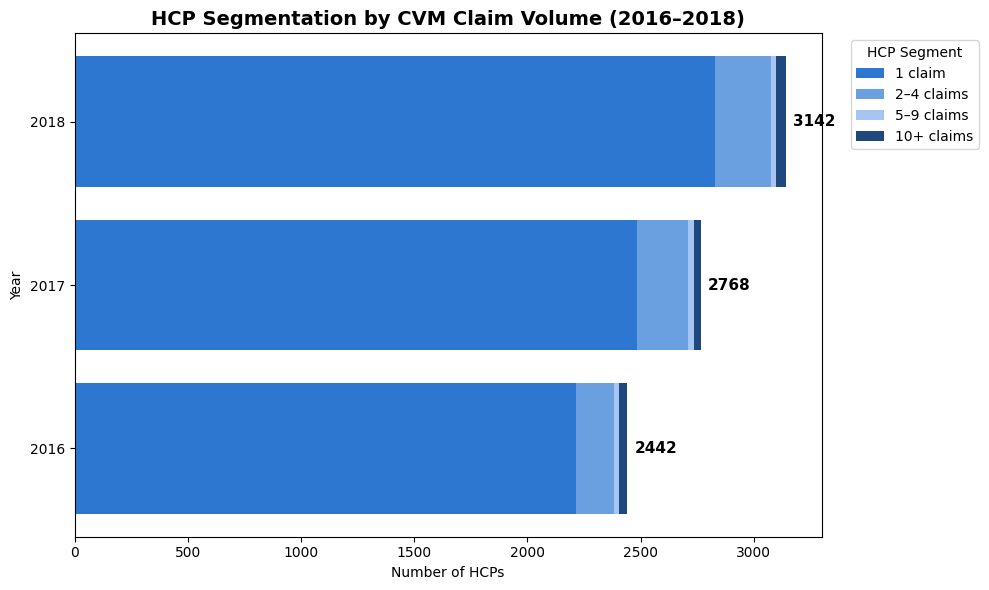

In [97]:
# 6) Horizontal Stacked bar chart (absolute HCP counts per year, per segment)
plot_df = plot_df.astype(int)

import numpy as np
import matplotlib.pyplot as plt

colors = ["#2E77D0", "#6AA0E0", "#A7C5F2", "#1F497D"]  # consistent palette

fig, ax = plt.subplots(figsize=(10, 6))

left = np.zeros(len(plot_df))

for i, seg in enumerate(plot_df.columns):
    vals = plot_df[seg].values
    ax.barh(plot_df.index, vals, left=left, color=colors[i], label=seg)
    left += vals

# ✅ Add total HCP text at the end of each bar
for y, total in enumerate(left):
    ax.text(total + 30, y, str(int(total)), va='center', fontsize=11, fontweight='bold', color='black')

ax.set_title("HCP Segmentation by CVM Claim Volume (2016–2018)", fontsize=14, fontweight="bold")
ax.set_xlabel("Number of HCPs")
ax.set_ylabel("Year")

ax.legend(title="HCP Segment", bbox_to_anchor=(1.03, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [98]:
# 7) Table for the write-up
summary_table = plot_df.astype(int)

# Add yearly total
summary_table["Total HCPs"] = summary_table.sum(axis=1)

# Sort years descending (2018 → 2016)
summary_table = summary_table.sort_index(ascending=False)

# Add total row (sum across all years)
total_row = pd.DataFrame(summary_table.sum(axis=0)).T
total_row.index = ["Total"]

# Combine
summary_with_total = pd.concat([summary_table, total_row])

summary_with_total

segment,1 claim,2–4 claims,5–9 claims,10+ claims,Total HCPs
2018,2829,248,20,45,3142
2017,2486,222,26,34,2768
2016,2216,166,23,37,2442
Total,7531,636,69,116,8352


### **Q3.	Evaluate the Patient Age demographics in the context of claim volume from 2016-2018. Bucket the patients into groups based on their age and explain the trends. How would you position the Marketing Budgets and the Promotions with respect to the changing landscape of the CVM claims and the respective patient segments?**

**a. Hints:**

1. Investigate the trend for patient age demographics for the CVM claims in years 2016–2018  
2. Utilize the solution for Q2  
3. To calculate the patient age, create a patient age column and subtract the year of patient birth date from the year of the **claim** date so you have the patient age at the time of the claim  
4. Use the following Segments for the patient age:  
   - **Segment #1:** 18–59 (Patients aged 18–59)  
   - **Segment #2:** 60–69 (Patients aged 60–69)  
   - **Segment #3:** 70–79 (Patients aged 70–79)  
   - **Segment #4:** 80+ (Patients aged 80 and above)  
5. Count the number of claims corresponding to the patients within each bucket **by year**  
6. Also, calculate the year-over-year change percentage in the claim volume for each age group  
7. Which marketing and promotion strategies would focus on the patients?

---

**b. Expected Technical Output:**

1. A stacked bar chart  
   - Each bar representing a year (2016–2018)  
   - Each section in the stacked bar stands for an age group and its value in the bar is the number of claims from the patients in that age group  
2. A table with year-over-year change percentage in the claim volume for each segment

**Answer**
>Summary of Table

While total claims increased steadily over the three-year period, most of this growth came from patients aged 60–69 and 70–79. The 60–69 segment grew by roughly 15% from 2016 to 2017 and continued to expand in 2018, while the 70–79 group posted double-digit year-over-year growth as well. In contrast, younger age groups represented only a small portion of claims and showed minimal change. Overall, the claims landscape is becoming increasingly concentrated among older adults, reinforcing the rising cardiovascular burden in the aging population.

>Marketing Budget & Promotion Strategy 

Given the growing CVM burden among patients aged 60 and above, marketing investment should prioritize education, diagnosis, and treatment pathways for seniors and their caregivers. This means strengthening disease awareness efforts around risk factor management and early symptom recognition. Partnerships with cardiology networks, geriatric practices, and primary care offices that see larger senior populations will be valuable in building trust and accelerating adoption of prevention and management solutions. Additionally, support programs that assist seniors in navigation of healthcare decisions, follow-up care, and medication adherence can help improve outcomes while reinforcing brand value.
At the same time, younger age segments represent a strategic long-term prevention opportunity. Digital-first campaigns such as lifestyle content, mobile health tools, and risk-education messaging can be used to reach these populations cost-effectively. Social media, telehealth partnerships, and community wellness programs can help raise awareness before disease becomes symptomatic. 




/tmp/ipykernel_10877/748852028.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cvm_df.groupby(['claim_year', 'age_group'])['age_group']


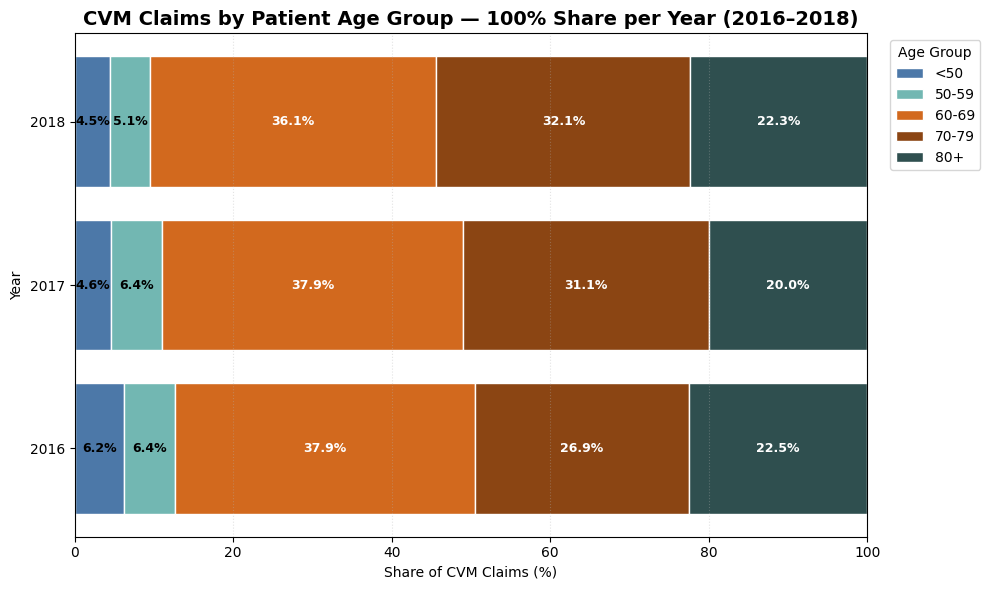

In [99]:
#age segmentation
bins   = [0, 50, 60, 70, 80, 120]
labels = ['<50', '50-59', '60-69', '70-79', '80+']

# CVM claims（
cvm_df = medicare_df[medicare_df['is_CVM'] == 1].copy()
cvm_df['age_group'] = pd.cut(cvm_df['patient_age'], bins=bins, labels=labels, ordered=True)

# 2016–2018
cvm_df = cvm_df[cvm_df['claim_year'].isin(['2016','2017','2018'])]

counts = (
    cvm_df.groupby(['claim_year', 'age_group'])['age_group']
          .count()
          .unstack(fill_value=0)
          .reindex(columns=labels)  
)

# percentage
pct_df = counts.div(counts.sum(axis=1), axis=0) * 100

# ==== 100% stack chart====
import numpy as np
import matplotlib.pyplot as plt

colors = ["#4C78A8", "#72B7B2", "#d2691e", "#8b4513", "#2f4f4f"]  # 5 組對比友善配色

fig, ax = plt.subplots(figsize=(10, 6))
left = np.zeros(len(pct_df)) 

# age segenmentation stack 
for i, seg in enumerate(pct_df.columns):
    vals = pct_df[seg].values
    bars = ax.barh(pct_df.index, vals, left=left, color=colors[i], label=seg, edgecolor="white")
    
    for y, (v, l) in enumerate(zip(vals, left)):
        if v > 2:
            ax.text(l + v/2, y, f"{v:.1f}%", ha="center", va="center",
                    fontsize=9, color="white" if v > 18 else "black", fontweight="bold")
    left += vals

# chart setting
ax.set_title("CVM Claims by Patient Age Group — 100% Share per Year (2016–2018)",
             fontsize=14, fontweight="bold")
ax.set_xlabel("Share of CVM Claims (%)")
ax.set_ylabel("Year")
ax.set_xlim(0, 100)
ax.grid(axis="x", linestyle=":", alpha=0.35)

ax.legend(title="Age Group", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()



In [106]:
#table of % / numbers/ YoY
# build counts table
counts = (
    pd.crosstab(cvm_df['claim_year'], cvm_df['age_group'])
      .reindex(index=['2016','2017','2018'], columns=labels)
      .fillna(0)
      .astype(int)
)

# build percentages table
pct = counts.div(counts.sum(axis=1), axis=0) * 100

final_table = pd.DataFrame(index=counts.index)
for col in labels:
    final_table[f'{col}_count'] = counts[col]
    final_table[f'{col}_%']     = pct[col].round(1)

final_table['Total Claims'] = counts.sum(axis=1)

# --- 1) Keep only the year rows (avoid previously appended Total/YoY rows) ---
years_only = final_table.loc[final_table.index.astype(str).isin(['2016', '2017', '2018'])].copy() 

# Identify count and percent columns
count_cols = [c for c in years_only.columns if c.endswith('_count')]
pct_cols   = [c for c in years_only.columns if c.endswith('_%')]

# --- 2) Build a single Total row: sum counts, set % columns to NaN, sum Total Claims ---
totals = pd.Series(index=years_only.columns, dtype=float)
totals[count_cols]     = years_only[count_cols].sum()
totals[pct_cols]       = np.nan   # do not show % in the Total row
totals['Total Claims'] = years_only['Total Claims'].sum()
totals.name = 'Total (2016–2018)'

# --- 3) Build YoY rows (apply ONLY to *_count columns; others set to NaN) ---
yoy_17_16_vals = ((years_only.loc['2017', count_cols] /
                    years_only.loc['2016', count_cols] - 1) * 100).round(1)
yoy_18_17_vals = ((years_only.loc['2018', count_cols] /
                    years_only.loc['2017', count_cols] - 1) * 100).round(1)

row_yoy_17_16 = pd.Series(index=years_only.columns, dtype=float)
row_yoy_17_16[count_cols] = yoy_17_16_vals.values
row_yoy_17_16.name = 'YoY % 2017 vs 2016'

row_yoy_18_17 = pd.Series(index=years_only.columns, dtype=float)
row_yoy_18_17[count_cols] = yoy_18_17_vals.values
row_yoy_18_17.name = 'YoY % 2018 vs 2017'

# --- 4) Combine into a clean table (no duplicate Totals, no YoY Total row, Total % empty) ---
clean_table = pd.concat([
    years_only,
    totals.to_frame().T,
    # Put "YoY % 2018 vs 2017" BEFORE "YoY % 2017 vs 2016"
    row_yoy_18_17.to_frame().T,
    row_yoy_17_16.to_frame().T
])

# Force desired row order with 2018 first
row_order = [
    '2018', '2017', '2016',
    'Total (2016–2018)',
    'YoY % 2018 vs 2017',
    'YoY % 2017 vs 2016'
]
clean_table = clean_table.loc[row_order]

clean_table


,<50_count,<50_%,50-59_count,50-59_%,60-69_count,60-69_%,70-79_count,70-79_%,80+_count,80+_%,Total Claims
2018,278.0,4.5,313.0,5.1,2230.0,36.1,1982.0,32.1,1379.0,22.3,6182.0
2017,242.0,4.6,333.0,6.4,1976.0,37.9,1620.0,31.1,1040.0,20.0,5211.0
2016,279.0,6.2,288.0,6.4,1695.0,37.9,1204.0,26.9,1009.0,22.5,4475.0
Total (2016–2018),799.0,NaN,934.0,NaN,5901.0,NaN,4806.0,NaN,3428.0,NaN,15868.0
YoY % 2018 vs 2017,14.9,NaN,-6.0,NaN,12.9,NaN,22.3,NaN,32.6,NaN,NaN
YoY % 2017 vs 2016,-13.3,NaN,15.6,NaN,16.6,NaN,34.6,NaN,3.1,NaN,NaN


### ***Extra Analysis_ICD-10 sub-disease segmentation***

This analysis explores cardiovascular-related Medicare claims by breaking down the ICD-10 “Diseases of the circulatory system” category (I00–I99) into clinically meaningful subgroups such as hypertensive diseases (I10–I15), ischemic heart diseases (I20–I25), cerebrovascular diseases (I60–I69), and others, based on the classification published by AAPC (2025). 
>https://www.aapc.com/codes/icd-10-codes-range/I00-I99/?srsltid=AfmBOooyCVAwB_L-4H39jkEsFaH8KMth0GhqM2VCegxj5qTJKcO-4B9r 

 By applying this subgroup mapping to a cohort defined via HCPCS cardiac procedure codes, we can move beyond a generic “cardiac” label to identify which specific circulatory diseases drive claim volumes, growth trends, and treatment demands, providing actionable insights for healthcare planning, market strategy, and resource allocation.

 **Result**
The chart illustrates cardiovascular-related Medicare claims segmented by ICD-10 circulatory disease subclasses from 2016 to 2018. Total claim volume rose steadily year-over-year, driven largely by cases grouped under “Other CV,” which remains the largest category. This high share indicates that a substantial portion of cardiac claims involve diverse or less-specific cardiovascular diagnoses that do not map cleanly into narrower ICD-10 categories, reflecting both the clinical complexity of cardiac patients and the breadth of coding practices across providers. Among identifiable conditions, hypertensive diseases and ischemic heart diseases stand out as the top contributors and show strong growth of more than 40% and 50% respectively over the period. Heart failure and atrial fibrillation also exhibit moderate increases, consistent with aging population trends. Smaller vascular and pulmonary circulatory categories remain low in volume, with occasional sharp percentage swings due to small baselines. Notably, the “Unknown” diagnosis group declined slightly in 2018, suggesting gradual improvement in coding specificity.

**Insight**
The upward trajectory in hypertension and ischemic heart disease claims underscores sustained demand for chronic cardiovascular care solutions, presenting strong opportunities for long-term medication programs, digital disease-management platforms, and adherence optimization services. Meanwhile, the high proportion of “Other CV” diagnoses suggests fragmented or non-specific coding patterns across providers, indicating potential value for diagnostic support tools, coding enhancement programs, and data-driven partnerships to improve clinical classification and uncover actionable patient cohorts. As nearly all segments show rising volumes, the analysis signals a growing cardiovascular burden in the Medicare population, reinforcing the need for preventive cardiometabolic interventions and senior-focused population-health strategies. Furthermore, although small in volume, faster-growing vascular and lymphatic sub-groups may represent emerging niches for targeted therapies and advanced diagnostics. Future work could include more granular ICD-10 segmentation or integration of clinical history and comorbidity data to refine patient clustering and uncover deeper treatment and intervention opportunities.



In [9]:
import pandas as pd
import numpy as np

# --- 1) Load raw data (adjust filenames/column names as needed) ---
header_df = pd.read_csv("parta_claims_header.csv", dtype=str)
dx_df     = pd.read_csv("parta_diagnosis_code.csv", dtype=str)  # contains clm_dgns_cd + cur_clm_uniq_id

# Extract claim year (assume header file contains either clm_from_dt or clm_thru_dt)
date_col = "clm_from_dt" if "clm_from_dt" in header_df.columns else "clm_thru_dt"
header_df["claim_year"] = (
    pd.to_datetime(header_df[date_col], errors="coerce")
      .dt.year.astype("Int64")
      .astype(str)
)

# Extract the first diagnosis code per claim 
# (replace with primary diagnosis logic if you have the official primary-dx field)
dx_first = (
    dx_df
    .sort_values(["cur_clm_uniq_id"])                     # sort by claim, optionally add diagnosis sequence column
    .groupby("cur_clm_uniq_id", as_index=False)["clm_dgns_cd"]
    .first()
)

# Merge into a simplified Medicare claims dataset
medicare_df = (
    header_df.merge(
        dx_first, left_on="cur_clm_uniq_id", right_on="cur_clm_uniq_id", how="left"
    )
    .rename(columns={
        "cur_clm_uniq_id": "claim_id",
        "clm_dgns_cd": "diagnosis_code"
    })
    [["claim_id", "claim_year", "diagnosis_code"]]
)

# --- 2) Create 'is_CVM' flag (cardiovascular-related claims) ---
# Best practice: use your HCPCS-based cardiac logic (merge in your HCPCS table if already created)
# Temporary proxy method (for testing only): treat ICD-10 codes starting with "I" (I00–I99) as CVM claims
medicare_df["is_CVM"] = (
    medicare_df["diagnosis_code"]
    .fillna("")
    .str.upper()
    .str.startswith("I")
    .astype(int)
)

# Optional: if you already know your diagnosis field name, assign manually
DIAG_COL = "diagnosis_code"


In [10]:
# CVM ICD-10 sub-disease segmentation (2016–2018)
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


YEAR_COL  = "claim_year"   
CLAIM_COL = "claim_id"     

# Try to detect the diagnosis code column name
diag_candidates = {"diagnosis_code", "clm_dgns_cd", "diag_cd", "icd_code"}
DIAG_COL = next((c for c in medicare_df.columns if c.lower() in diag_candidates), None)
if DIAG_COL is None:
    raise ValueError("Could not find a diagnosis code column (e.g., diagnosis_code / clm_dgns_cd).")

# Filter to CVM claims in 2016–2018
years = ["2016", "2017", "2018"]
cv = medicare_df.loc[
    (medicare_df["is_CVM"] == 1) &
    (medicare_df[YEAR_COL].astype(str).isin(years))
].copy()

# ICD-10 I00–I99 sub-disease mapping (WHO chapter I blocks)
def icd_i_block(code: str) -> str:
    if not isinstance(code, str):
        return "Unknown"
    c = code.strip().upper()
    if not c.startswith("I"):
        return "Other CV"  # non-I codes (should be rare in a CVM filter)
    m = re.match(r"^I(\d{2})", c)  # capture first two digits after 'I'
    if not m:
        return "Other CV"
    n = int(m.group(1))

    if   0  <= n <= 2:   return "Acute rheumatic fever"
    elif 5  <= n <= 9:   return "Chronic rheumatic heart diseases"
    elif 10 <= n <= 15:  return "Hypertensive diseases"
    elif 20 <= n <= 25:  return "Ischemic heart diseases"
    elif 26 <= n <= 28:  return "Pulmonary heart disease & pulmonary circulation"
    elif 30 <= n <= 52:  return "Other forms of heart disease"
    elif 60 <= n <= 69:  return "Cerebrovascular diseases"
    elif 70 <= n <= 79:  return "Diseases of arteries/arterioles/capillaries"
    elif 80 <= n <= 89:  return "Diseases of veins/lymphatics/lymph nodes"
    elif 90 <= n <= 94:  return "Other circulatory system disorders"
    elif 95 <= n <= 99:  return "Other/unspecified circulatory disorders"
    else:
        return "Other CV"

cv["cv_subgroup"] = cv[DIAG_COL].map(icd_i_block)

# Aggregate: unique claims by (year x subgroup)
agg = (
    cv.groupby([YEAR_COL, "cv_subgroup"])[CLAIM_COL]
      .nunique()
      .rename("claims")
      .reset_index()
)

# Pivot to a matrix: rows = subgroup, columns = year
cv_seg = (
    agg.pivot(index="cv_subgroup", columns=YEAR_COL, values="claims")
       .reindex(columns=years)
       .fillna(0)
       .astype(int)
)

# YoY % change (avoid division by zero)
cv_seg["YoY % 17 vs 16"] = (
    (cv_seg["2017"] - cv_seg["2016"]) / cv_seg["2016"].replace(0, np.nan) * 100
).round(1)
cv_seg["YoY % 18 vs 17"] = (
    (cv_seg["2018"] - cv_seg["2017"]) / cv_seg["2017"].replace(0, np.nan) * 100
).round(1)

# Sort subgroups by 2018 claim count (descending)
cv_seg = cv_seg.sort_values("2018", ascending=False)


cv_seg 





claim_year,2016,2017,2018,YoY % 17 vs 16,YoY % 18 vs 17
cv_subgroup,,,,,
Hypertensive diseases,132,164,159,24.2,-3.0
Other forms of heart disease,84,98,95,16.7,-3.1
Ischemic heart diseases,55,65,92,18.2,41.5
Cerebrovascular diseases,11,11,18,0.0,63.6
Diseases of arteries/arterioles/capillaries,11,16,10,45.5,-37.5
Diseases of veins/lymphatics/lymph nodes,3,6,5,100.0,-16.7
Chronic rheumatic heart diseases,4,2,5,-50.0,150.0
Pulmonary heart disease & pulmonary circulation,3,1,4,-66.7,300.0
Other/unspecified circulatory disorders,3,1,2,-66.7,100.0


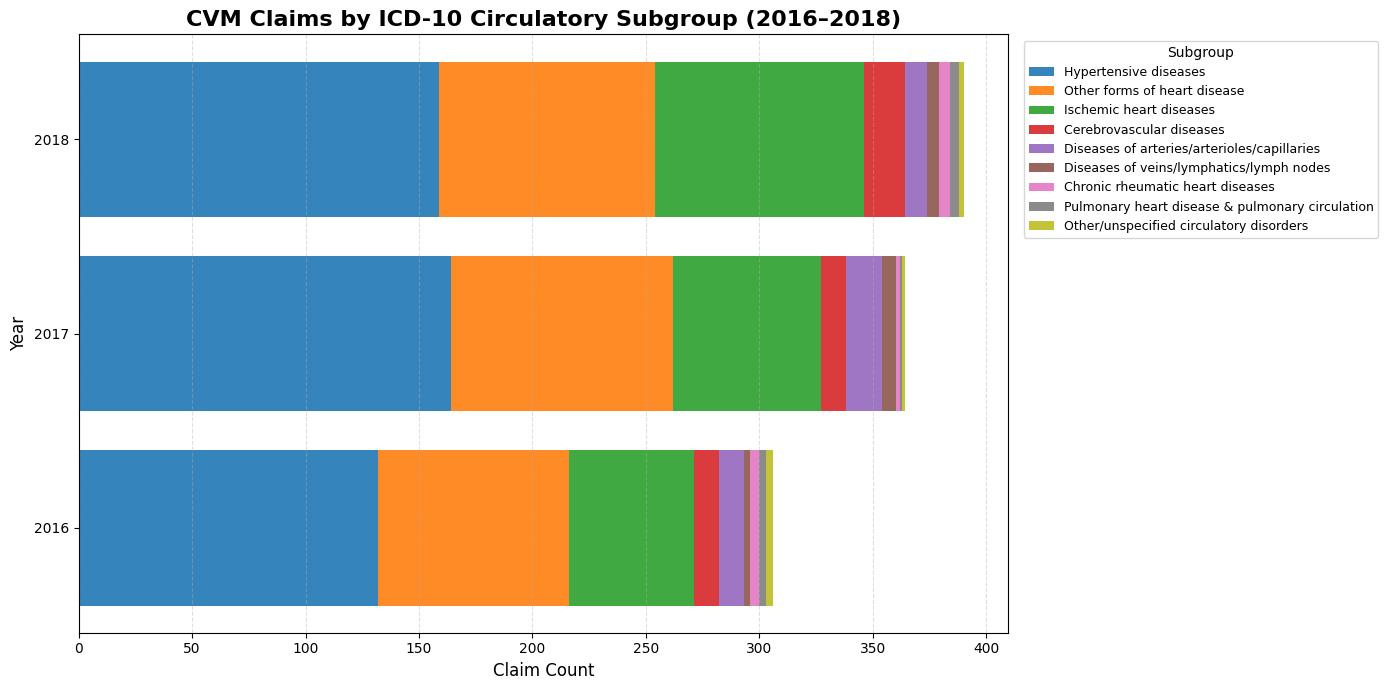

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Reorder rows so 2018 is on top
plot_df = cv_seg[["2018", "2017", "2016"]].T

# Larger figure for clarity
fig, ax = plt.subplots(figsize=(14, 7))  # wider and taller

# Horizontal stacked bar chart
left = np.zeros(len(plot_df))
for subgroup in plot_df.columns:
    vals = plot_df[subgroup].values
    ax.barh(plot_df.index, vals, left=left, label=subgroup, alpha=0.9)
    left += vals

# Formatting
ax.set_title("CVM Claims by ICD-10 Circulatory Subgroup (2016–2018)", 
             fontsize=16, fontweight="bold")
ax.set_xlabel("Claim Count", fontsize=12)
ax.set_ylabel("Year", fontsize=12)

# Show grid for readability
ax.grid(axis='x', linestyle='--', alpha=0.4)

# Put highest year (2018) on top
ax.invert_yaxis()

# Move legend outside, more compact
ax.legend(title="Subgroup", bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()